## Task2: OCR and Sentiment Analysis

#### Short explanations are given as comments wherever required

#### Please run each cell to get complete final output

### OCR 

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop

##### Cell 2

In [ ]:
# Converting the csv data to image

# sent=pd.read_csv('alphabets_28x28.csv')
# sent=sent.dropna()
# sent=sent.drop_duplicates()
# sent=sent.reset_index(drop=True)
# g=[]
# for i in range(sent['label'].nunique()):
#     sum=0
#     for j in range(i+1):
#         sum+=sent['label'].value_counts().sort_index().iloc[j]
#     g.append(sum-1)    
# l=[0]   
# for i in range(len(g)-1):
#     l.append(g[i]+1)
# name_1=np.zeros((26*500,1),dtype='str')
# label_1=np.zeros((26*500,1),dtype='str')
# name=[]
# label=[]
# for i in range(1,(26*500)+1):
#     name.append(f'grayscale_image_{i}.png')  
#     if (i%500)!=0:
#         label.append((sent['label'].unique())[i//500])
#     else:
#         label.append((sent['label'].unique())[(i//500)-1])
# data=(
#     name,
#     label
# )
# excel=pd.DataFrame(data,index=["Name","Label"])
# width, height = 28,28
# for k in range(26):
#     count=0
#     for z in range(l[k],g[k]):
#         if count<500:
#             grayscale_image = np.zeros((width,height))
#             for i in range(width):
#                 for j in range(height):
#                     h=(i*width)+j+1
#                     grayscale_image[i][j]=sent.iloc[z][h]
#             grayscale_image=(grayscale_image).astype('uint8')
#             # Convert the numpy array to a PIL image
#             image = Image.fromarray(grayscale_image)
#             count+=1
#             #image.show()
#             image.save(f'grayscale_image_{(k*500)+count}.png')
            

In [2]:
# Spliting the dataset into training,validation dataset
output_dir= 'alphabet_28x28_images'

img_height, img_width = 28, 28
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,        
    validation_split=0.2   
)


train_generator = train_datagen.flow_from_directory(
    output_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    output_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical',
    subset='validation'
)


Found 10400 images belonging to 26 classes.
Found 2600 images belonging to 26 classes.


In [ ]:
# Building and Training of the CNN Model
mod = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(len(train_generator.class_indices), activation='softmax')
])


mod.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001), loss = 'binary_crossentropy',metrics = ['acc'])


history = mod.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20
)
mod.save('tensorflow_ocr.h5')

C:\Users\vishn\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
325/325 ━━━━━━━━━━━━━━━━━━━━ 16s 43ms/step - acc: 0.0358 - loss: 0.3737 - val_acc: 0.0765 - val_loss: 0.1649
Epoch 2/20
325/325 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - acc: 0.0744 - loss: 0.1638 - val_acc: 0.0650 - val_loss: 0.1616
Epoch 3/20
325/325 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - acc: 0.1415 - loss: 0.1603 - val_acc: 0.2654 - val_loss: 0.1553
Epoch 4/20
325/325 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - acc: 0.3102 - loss: 0.1499 - val_acc: 0.3758 - val_loss: 0.1294
Epoch 5/20
325/325 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - acc: 0.4796 - loss: 0.1180 - val_acc: 0.5531 - val_loss: 0.0987
Epoch 6/20
325/325 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - acc: 0.6288 - loss: 0.0869 - val_acc: 0.6296 - val_loss: 0.0806
Epoch 7/20
325/325 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - acc: 0.7092 - loss: 0.0677 - val_acc: 0.6827 - val_loss: 0.0700
Epoch 8/20
325/325 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - acc: 0.7528 - loss: 0.0586 - val_acc: 0.7204 - val_loss: 0.0628
Epoch 9/20
325/325 ━━━━━━━━━━━━━━━━━━━━ 

In [3]:
mod=tf.keras.models.load_model('tensorflow_ocr.h5')

In [4]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

In [5]:
# Loading the csv file
sent=pd.read_csv('alphabets_28x28.csv')
sent=sent.dropna()
sent=sent.drop_duplicates()
sent=sent.reset_index(drop=True)

C:\Users\vishn\AppData\Local\Temp\ipykernel_22064\2243735585.py:2: DtypeWarning: Columns (1,2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  sent=pd.read_csv('alphabets_28x28.csv')


##### Cell 8

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step
This image is probably S


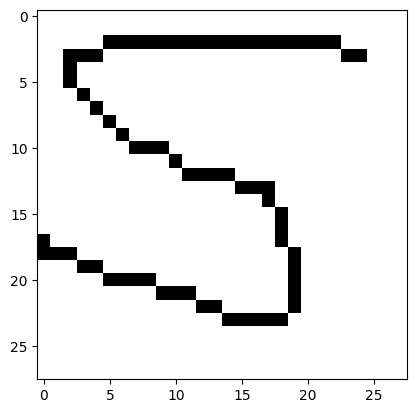

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
This image is probably D


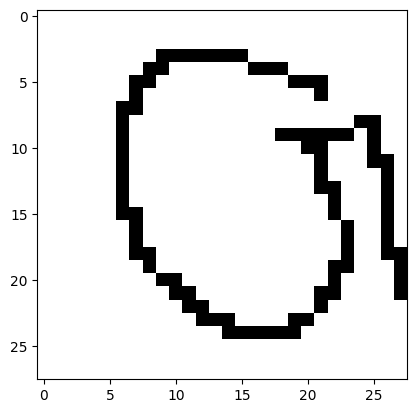

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
This image is probably A


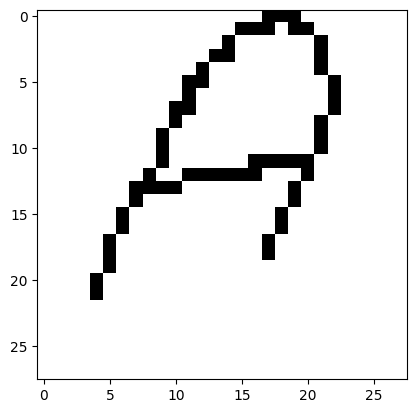

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
This image is probably J


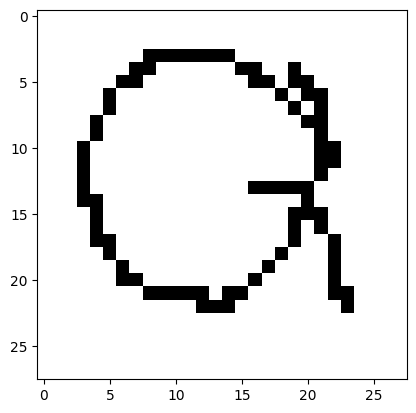

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
This image is probably I


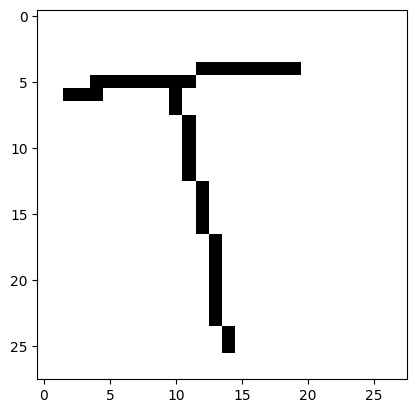

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
This image is probably B


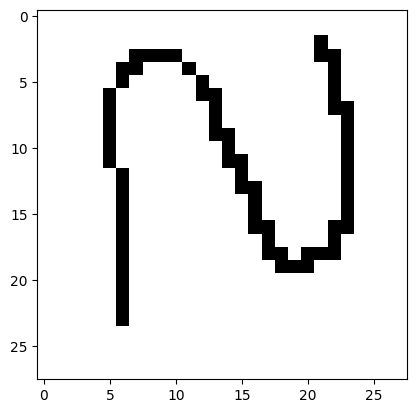

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
This image is probably F


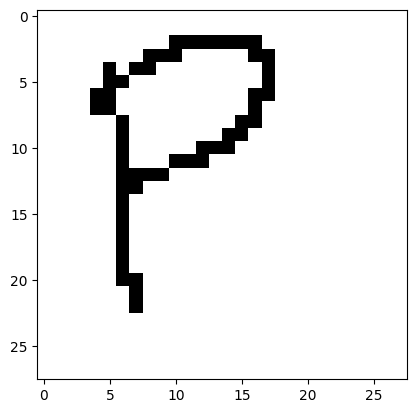

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
This image is probably K


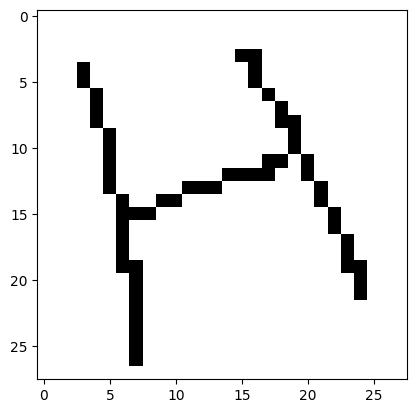

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
This image is probably K


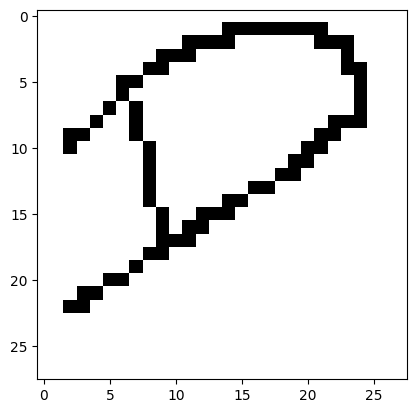

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
This image is probably K


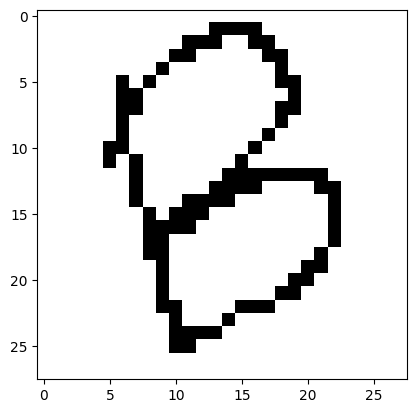

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
This image is probably R


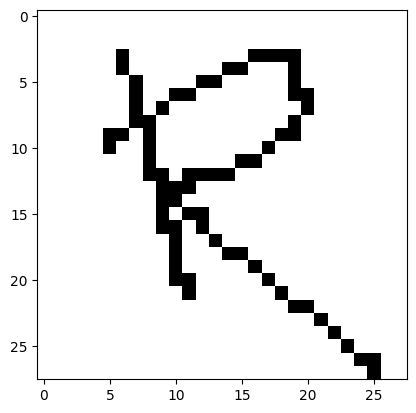

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
This image is probably I


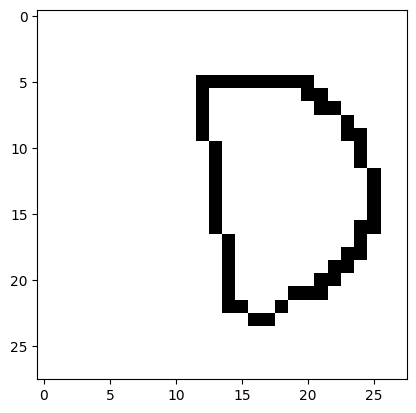

In [6]:
# Testing the model with custom dataset
c=1
while os.path.isfile(f"test_images/image_{c}.png"):
    img=cv2.imread(f"test_images/image_{c}.png")[:,:,0]
    img=np.invert(np.array([img]))
    pred=mod.predict(img)
    print(f"This image is probably {sent['label'].unique()[np.argmax(pred)]}")
    plt.imshow(img[0],cmap=plt.cm.binary)
    plt.show()
    c+=1

In [ ]:
# Loading the saved model
# Image Segmentation and drawing contours

mod=tf.keras.models.load_model('tensorflow_ocr_1.h5')
def segment_image(image_path):
    #  image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    
    _, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    
    segmented_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    cv2.drawContours(segmented_image, contours, -1, (0, 255, 0), 2)
    
    return image, contours

image_path = 'target_images/line_2.png'  
original_image, contours = segment_image(image_path)

segmented_image = cv2.cvtColor(original_image, cv2.COLOR_GRAY2BGR)
cv2.drawContours(segmented_image, contours, -1, (0, 255, 0), 2)
cv2.imshow('Segmented Image', segmented_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
# Preprocessing the segmented image
def pad_image_to_28x28(image):
    h, w = image.shape[:2]
    top = (28 - h) // 2
    bottom = 28 - h - top
    left = (28 - w) // 2
    right = 28 - w - left
    padded_image = cv2.copyMakeBorder(image, top, bottom, left, right, cv2.BORDER_CONSTANT, value=0)
    return padded_image
def preprocess_region(region):
    # Resize the region to match the input size of the OCR model (e.g., 28x28)
    region = pad_image_to_28x28(region)
    region = region.astype('float32') / 255.0  # Normalize the region
    region = np.expand_dims(region, axis=-1)  # Add channel dimension
    region = np.expand_dims(region, axis=0)   # Add batch dimension
    return region


In [ ]:
def recognize_characters_with_whitespace(image, contours, model, whitespace_threshold=10):
    contours = sorted(contours, key=lambda c: cv2.boundingRect(c)[0])
    recognized_text = ""
    previous_x = None
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        region = image[y:y+h, x:x+w]
        processed_region = preprocess_region(region)
        prediction = model.predict(processed_region)
        character = chr(np.argmax(prediction) + ord('A'))  # Adjust according to your model's output
        if previous_x is not None and (x - previous_x) > whitespace_threshold:
            recognized_text += " "
        recognized_text += character
        previous_x = x + w
    return recognized_text


In [10]:
# OCR of obtained text from the processed image using the model
def recognize_characters(image, contours, model):
    recognized_text = ""
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        region = image[y:y+h, x:x+w]
        processed_region = preprocess_region(region)
        prediction = model.predict(processed_region)
        character = sent['label'].unique()[np.argmax(prediction)]  
        recognized_text += character
    return recognized_text


recognized_text = recognize_characters_with_whitespace(original_image, contours, ocr_model)
print('Recognized Text:', recognized_text)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━

### Sentiment Analysis

In [4]:
# Loading sentiment source file
info=pd.read_csv('sentiment_analysis_dataset.csv')
info_1 =pd.read_csv('sentiment_analysis_dataset.csv')

In [13]:
# Finding probability of each sentiment(in the order of info['sentiment'].unique())
p_sent=[]
for i in range(info['sentiment'].nunique()):
    p_sent.append((info['sentiment'].value_counts().sort_index().iloc[i])/info['sentiment'].count())

In [6]:
# Finding word count in each document
word_count=[]
for i in range(info['line'].count()):
    count=0
    for index, char in enumerate(info['line'].iloc[i]):
        if char.isspace():
            count+=1
    word_count.append(count+1)

In [8]:
word=word_count

In [7]:
#converting info['line'] to str datatype
info['line']=info['line'].astype('str')

In [9]:
# Spilting each string to identify different words present in them
# Adding all words to vocab list
info['line']=info['line'].str.split()
vocab=[]
l=info['line'].iloc[0]
vocab.append(l[0])
for i in range(info['line'].count()):
    l=info['line'].iloc[i]
    for j in range(word_count[i]):
        if l[j] not in vocab:
            vocab.append(l[j])       

In [10]:
# Finding count of each vocab word wrt all given sentiments
final=np.zeros(shape=(info['sentiment'].nunique(),len(vocab)),dtype='int')
for i in range(info['line'].count()):
    tot_1=np.zeros(shape=(info['sentiment'].nunique(),len(vocab)),dtype='int')
    l=info['line'].iloc[i]  
    g=np.where(info['sentiment'].unique()==info['sentiment'].iloc[i])[0]
    for j in range(word[i]):
        tot_1[g[0]][vocab.index(l[j])]+=1
    for j in range(len(vocab)):
        if tot_1[g[0]][j]>1:
            tot_1[g[0]][j]=1    
    final+=tot_1

In [19]:
# Parameter estimation using the obtained count
para=np.zeros(shape=(info['sentiment'].nunique(),len(vocab)))
sum=[]
for i in range(info['sentiment'].nunique()):
    sm=0
    for j in range(len(vocab)):
        sm+=final[i][j]
    sum.append(sm+len(vocab))
for i in range(info['sentiment'].nunique()):
    for j in range(len(vocab)):
        para[i][j]=(final[i][j]+1)/sum[i]

In [20]:
# Implementation of Sentiment Analysis
target=
cn=0
for i in range(len(target)):
    if target[i].isspace():
        cn+=1   
cn+=1
li=[]
kim=0
for i in range(cn):
    gu=""
    for j in range(kim,len(target)):
        if target[j].isspace():
            kim=j+1
            break
        else:
            gu+=target[j]
    li.append(gu)
test_data=[]
for i in range(len(li)):
    if li[i] in vocab:
        test_data.append(li[i])
test_data      
test_index=[]
for i in range(len(test_data)):
    test_index.append(vocab.index(test_data[i]))    

In [21]:
# Finding the most probable sentiment
max=0
best=0
prob=[]
for i in range(info_1['sentiment'].nunique()):
    p=1
    for j in range(len(test_data)):
        p*=para[i][test_index[j]]
    p*=p_sent[i]
    prob.append(p)
    if i==0:
        max=p
        best=i
    else:
        if max<p:
            max=p
            best=i            
print("Given data is probably on the '",info['sentiment'].unique()[best],"' note")

Given data is probably on the ' Angry ' note
